In [1]:
import sys
import os
import time
searchPath=os.path.abspath('..')
sys.path.append(searchPath)

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
import numpy as np
import matplotlib.pyplot as plt
from knn.knn_base import KNN
from knn.knn_kdtree import KNNKdTree
from utils.data_generater import random_points
from utils.plot import plot_knn_predict

In [3]:
def getData(number):
    data = random_points(2, number)
    label = [0] * (number // 2) + [1] * (number // 2)
    return np.array(data), np.array(label)

In [4]:
dataList = []
labelList = []
for num in [30, 500, 1000, 2000, 5000, 10000, 50000, 400000]:
    data, label = getData(num)
    dataList.append(data)
    labelList.append(label)

In [5]:
models = {"knn":KNN(), "kdtree":KNNKdTree()}

In [6]:
for data, label in zip(dataList, labelList):
    for name, model in models.items():
        startTime = time.time()
        model.fit(data, label)
        for i in range(5):
            model.predict([0.3, 0.2])
        print("model = %s, dataNum = %s, takeTime = %s"%(name, len(data), round(time.time() - startTime, 5)))

model = knn, dataNum = 30, takeTime = 0.001
model = kdtree, dataNum = 30, takeTime = 0.00201
model = knn, dataNum = 500, takeTime = 0.02202
model = kdtree, dataNum = 500, takeTime = 0.008
model = knn, dataNum = 1000, takeTime = 0.035
model = kdtree, dataNum = 1000, takeTime = 0.013
model = knn, dataNum = 2000, takeTime = 0.067
model = kdtree, dataNum = 2000, takeTime = 0.02404
model = knn, dataNum = 5000, takeTime = 0.18897
model = kdtree, dataNum = 5000, takeTime = 0.05904
model = knn, dataNum = 10000, takeTime = 0.3523
model = kdtree, dataNum = 10000, takeTime = 0.13304
model = knn, dataNum = 50000, takeTime = 1.77306
model = kdtree, dataNum = 50000, takeTime = 0.83014
model = knn, dataNum = 400000, takeTime = 13.71175
model = kdtree, dataNum = 400000, takeTime = 10.00363


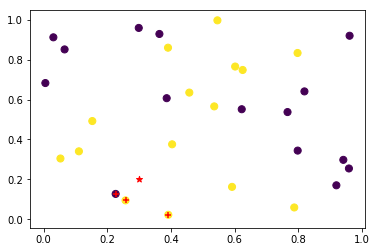

In [7]:
point = (0.3, 0.2)
model = KNNKdTree()
model.fit(dataList[0], labelList[0])
plot_knn_predict(model, dataList[0], labelList[0], point)

In [8]:
# verify
iris = load_iris()
iris_data = iris.data
iris_label = iris.target
X_train, X_test, y_train, y_test = train_test_split(iris_data, iris_label, test_size=0.2)
model = KNNKdTree()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.9666666666666667